In [1]:
import pandas as pd
from datetime import datetime, timedelta
from os import path
import glob
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
date = datetime.today() - timedelta(days = 1)
min_date = datetime(year = 2020, month = 1, day = 22)

data_dir = "data"

while date >= min_date:
    date_formatted = date.strftime("%m-%d-%Y")
    filepath = f"{data_dir}/{date_formatted}.csv"
    if not path.isfile(filepath):    
        url = f"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{date_formatted}.csv"
        dataframe = pd.read_csv(url)
        dataframe.to_csv(filepath, index = False)
        print(f"Saved {filepath}")
    else:
        print(f"Skipped {filepath}")
    date = date - timedelta(days = 1)

Saved data/04-12-2020.csv
Saved data/04-11-2020.csv
Saved data/04-10-2020.csv
Skipped data/04-09-2020.csv
Skipped data/04-08-2020.csv
Skipped data/04-07-2020.csv
Skipped data/04-06-2020.csv
Skipped data/04-05-2020.csv
Skipped data/04-04-2020.csv
Skipped data/04-03-2020.csv
Skipped data/04-02-2020.csv
Skipped data/04-01-2020.csv
Skipped data/03-31-2020.csv
Skipped data/03-30-2020.csv
Skipped data/03-29-2020.csv
Skipped data/03-28-2020.csv
Skipped data/03-27-2020.csv
Skipped data/03-26-2020.csv
Skipped data/03-25-2020.csv
Skipped data/03-24-2020.csv
Skipped data/03-23-2020.csv
Skipped data/03-22-2020.csv
Skipped data/03-21-2020.csv
Skipped data/03-20-2020.csv
Skipped data/03-19-2020.csv
Skipped data/03-18-2020.csv
Skipped data/03-17-2020.csv
Skipped data/03-16-2020.csv
Skipped data/03-15-2020.csv
Skipped data/03-14-2020.csv
Skipped data/03-13-2020.csv
Skipped data/03-12-2020.csv
Skipped data/03-11-2020.csv
Skipped data/03-10-2020.csv
Skipped data/03-09-2020.csv
Skipped data/03-08-2020.cs

In [3]:
data_files = glob.glob(f"{data_dir}/*.csv")

daily_dataframes = []
p = re.compile(r'(\d{2}-\d{2}-\d{2})')

for file in data_files:
    daily_dataframe = pd.read_csv(file)
    daily_dataframe = daily_dataframe.rename({"Last_Update": "Last Update", "Country_Region": "Country/Region"}, axis=1)
    daily_dataframe["Last Update"] = p.search(file).group()
    daily_dataframes.append(daily_dataframe)

combined_data = pd.concat(daily_dataframes, axis=0, ignore_index=True, sort=False)
combined_data = combined_data.sort_values(by="Last Update", ascending=False)
combined_data = combined_data.filter(["Country/Region", "Last Update", "Confirmed", "Deaths", "Recovered"], axis=1)
combined_data["Last Update"] = combined_data["Last Update"].apply(lambda x: datetime.strptime(x, "%m-%d-%y"))
combined_data["Country/Region"] = combined_data["Country/Region"].replace("United Kingdom", "UK")
combined_data["Country/Region"] = combined_data["Country/Region"].replace("Mainland China", "China")

In [4]:
countries_selected = ["UK", "Italy"]
filtered_data = combined_data[combined_data["Country/Region"].isin(countries_selected)]
grouped_data = filtered_data.groupby(by=["Last Update", "Country/Region"]).sum()
print(grouped_data.tail(10))

                            Confirmed   Deaths  Recovered
Last Update Country/Region                               
2020-04-08  Italy            139422.0  17669.0    26491.0
            UK                61474.0   7111.0      345.0
2020-04-09  Italy            143626.0  18279.0    28470.0
            UK                65872.0   7993.0      359.0
2020-04-10  Italy            147577.0  18849.0    30455.0
            UK                74605.0   8974.0      588.0
2020-04-11  Italy            152271.0  19468.0    32534.0
            UK                79874.0   9892.0      622.0
2020-04-12  Italy            156363.0  19899.0    34211.0
            UK                85206.0  10629.0      626.0


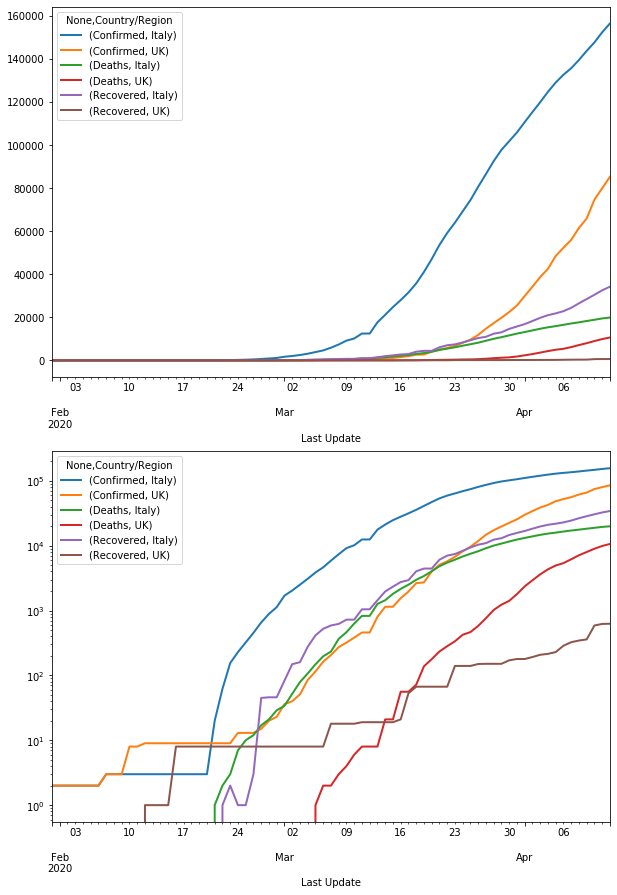

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(10,15))
clean_data = grouped_data.unstack()
clean_data.plot(kind="line", ax=ax[0], lw=2)
clean_data.plot(kind="line", ax=ax[1], lw=2)
ax[1].set_yscale("log")